<h1> Phase 2 Project </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Collect entire data 

data = pd.read_csv('data/kc_house_data.csv')

# Initial Exploration

In [3]:
# Checkout all data columns & spot Null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

# Data Cleaning

In [4]:
# Create a copy of the data, but with only the columns I'll be working with

df = data.drop(['id', 'date', 'view', 'address', 'lat', 'long'], axis=1)

*RJ: Additional drops added below:

In [5]:
df = df.drop(['waterfront', 'greenbelt', 'nuisance', 'condition', 'heat_source', 'sewer_system', 'yr_built', 'yr_renovated'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30155 non-null  float64
 1   bedrooms       30155 non-null  int64  
 2   bathrooms      30155 non-null  float64
 3   sqft_living    30155 non-null  int64  
 4   sqft_lot       30155 non-null  int64  
 5   floors         30155 non-null  float64
 6   grade          30155 non-null  object 
 7   sqft_above     30155 non-null  int64  
 8   sqft_basement  30155 non-null  int64  
 9   sqft_garage    30155 non-null  int64  
 10  sqft_patio     30155 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 2.5+ MB


# Visually Inspecting Variables

Text(0.5, 0, 'dependent_count')

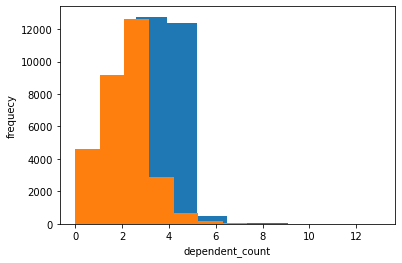

In [7]:
ax = df['bedrooms'].plot.hist()
ax.set_ylabel("frequecy")
ax.set_xlabel("dependent_count")

ax = df['bathrooms'].plot.hist()
ax.set_ylabel("frequecy")
ax.set_xlabel("dependent_count")

In [8]:
# Histograms indicate that >6 bedrooms, >6 bathrooms are outliers. Confirm with table data.

# We can also say any values < 100 were dropped from df[bedrooms] and df[bathrooms]. 

print(df['bedrooms'].value_counts().sort_index())
print(df['bathrooms'].value_counts().sort_index())



0        44
1       391
2      3936
3     12754
4      9597
5      2798
6       498
7        80
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64
0.0       31
0.5        5
1.0     4576
1.5     1808
2.0     7349
2.5     8475
3.0     4117
3.5     2266
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
6.5       25
7.0       12
7.5       12
8.0        2
8.5        1
9.5        2
10.0       1
10.5       1
Name: bathrooms, dtype: int64


In [9]:
# Dropping houses with 0 bedrooms/bathrooms

# RJ: edited to greater than or equal to 1 so that we can drop the 0.5 bathrooms.

#Dropping: Bedrooms >= 1 AND <= 6
#df = 
df = df[df['bedrooms'] >= 1]
df = df[df['bedrooms'] <= 6]

df = df[df['bathrooms'] >= 1]
df = df[df['bathrooms'] <= 6]


df['bedrooms'].value_counts()
df['bathrooms'].value_counts()

#Dropping: Bathrooms >= 1 AND <= 6
#df = df[df.bathrooms.isin([1,7])]

df.info()

n = 30155
nd = (30155 - 29921)

print(f"\n")
print (f"Dropped {nd/n*100:.1f}% of the total number of datapoints")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29921 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29921 non-null  float64
 1   bedrooms       29921 non-null  int64  
 2   bathrooms      29921 non-null  float64
 3   sqft_living    29921 non-null  int64  
 4   sqft_lot       29921 non-null  int64  
 5   floors         29921 non-null  float64
 6   grade          29921 non-null  object 
 7   sqft_above     29921 non-null  int64  
 8   sqft_basement  29921 non-null  int64  
 9   sqft_garage    29921 non-null  int64  
 10  sqft_patio     29921 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 2.7+ MB


Dropped 0.8% of the total number of datapoints


In [1]:
df['bedrooms'].value_counts().sort_index()

NameError: name 'df' is not defined

In [11]:
df['bathrooms'].value_counts().sort_index()

1.0    4560
1.5    1807
2.0    7341
2.5    8470
3.0    4083
3.5    2256
4.0     616
4.5     518
5.0     135
5.5     100
6.0      35
Name: bathrooms, dtype: int64

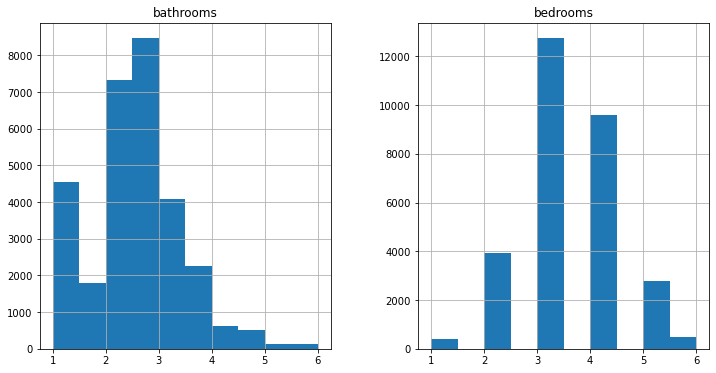

In [12]:
df.hist(['bathrooms', 'bedrooms'], figsize=(12,6), layout=(1,2));

In [13]:
# Converting sqft from basement, garage, and patio into binary to see if they have it or they don't have it

df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['garage'] = df['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
df['patio'] = df['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

print(df['basement'].value_counts(normalize=True),
      df['garage'].value_counts(normalize=True), 
      df['patio'].value_counts(normalize=True))

0    0.513853
1    0.486147
Name: basement, dtype: float64 1    0.669597
0    0.330403
Name: garage, dtype: float64 1    0.77611
0    0.22389
Name: patio, dtype: float64


In [14]:
# Make dummy tables for potential categorical features

dummy_bedrooms = pd.get_dummies(df['bedrooms'], drop_first=True)
dummy_bathrooms = pd.get_dummies(df['bathrooms'], drop_first=True)
dummy_floors = pd.get_dummies(df['floors'], drop_first=True)
dummy_grade = pd.get_dummies(df['grade'], drop_first=True)

In [15]:
# getting rid of the outliers on top & bottom .025%
#outliers = ['sqft_living','price']
#df_old = df.copy()

#for col in outliers:
#    df = df[(df[col] > np.percentile(df[col], .25)) & (df[col] < np.percentile(df[col], 99.75))]

In [16]:
# RJ: This gets rid of all of our data (n=7298 after I run it), so for the presentation I'm not going to remove outliers here, we'll deal with it later.

#outliers = ['sqft_above', 'sqft_basement', 'sqft_patio', 'sqft_garage']

#for col in outliers:
 #   df = df[(df[col] > np.percentile(df[col], .25)) & (df[col] < np.percentile(df[col], 99.75))]

In [17]:
#df.info()

In [18]:
nd = 30155-29617

print(f"Dropped {nd/n*100:.1f}% of the total data")

Dropped 1.8% of the total data


***

## Histogram of Continuous Variables (Price, Sqft_Living)

In [ ]:
df.hist(['price', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'], figsize=(12,8));

In [ ]:
#Very Skewed left. Sqft_above less so.

In [ ]:
df.hist(['sqft_living'], figsize=(6,4));

# Data Exploration

In [ ]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

# Model 2

**Home Extensions**
1. Which rooms expansions are associated with higher sale price?

3. Which type of room expansion contributes the most to increased house sale value?
    * Multiple Linear Regression Model. Iterative model (R2 + 2 feature coefficients). 
        * Start with sqft_above. Add in sqft_basement, sqft_garage, sqft_patio, sqft_outdoor_space (sqft_lot - sqft_living)

### First: Calculate sqft_outdoor_space

In [19]:
df['sqft_outdoor'] = df['sqft_lot'] - df['sqft_living']

## Step by Step Linear Regression

### Start with sqft_above bc it's the core living area

In [20]:
# Log Transforming all variables

Y = df['price']
x1 = df['sqft_above']

model = sm.OLS(Y,sm.add_constant(x1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:16:52   Log-Likelihood:            -4.4587e+05
No. Observations:               29921   AIC:                         8.917e+05
Df Residuals:                   29919   BIC:                         8.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.548e+05   9644.032     16.052      0.000    1.36e+05    1.74e+05
sqft_above   523.7227      4.837    108.278      0.000     514.242     533.203
==============================================================================
Omnibus:                    40081.265   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32893524.379
Skew:                           7.146   Prob(JB):                         0.00
Kurtosis:                     164.803   Cond. No.                     4.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
colnames = ['sqft_above']
r2_list = [0.282]
coef_list = [523.72]

x2 = ['sqft_basement', 'sqft_above'] #2nd variable in our iteration
x2 = df[x2]

#x_log['sqft_basement'] = np.log(df['sqft_basement'])

model2 = sm.OLS(Y, sm.add_constant(x2)).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     8363.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:23:21   Log-Likelihood:            -4.4417e+05
No. Observations:               29921   AIC:                         8.883e+05
Df Residuals:                   29918   BIC:                         8.884e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.094e+04   9992.157     -9.101      0.000   -1.11e+05   -7.14e+04
sqft_basement   414.2725      6.911     59.945      0.000     400.727     427.818
sqft_above      551.6699      4.594    120.086      0.000     542.665     560.674
==============================================================================
Omnibus:                    41983.331   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47826163.838
Skew:                           7.730   Prob(JB):                         0.00
Kurtosis:                     198.251   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Onwards to save time

In [97]:
x3 = ['sqft_basement', 'sqft_above', 'sqft_patio']
#2nd variable in our iteration
x3 = df[x3]

#x_log['sqft_basement'] = np.log(df['sqft_basement'])

model_3 = sm.OLS(Y, sm.add_constant(x3)).fit()

model_3.summary()


graph_df = pd.DataFrame(model_3.params)
graph_df.reset_index()

graph_df.sort_values(by=0)
#graph_df.drop(, axis=0)

,0
const,-91390.497282
sqft_patio,336.933918
sqft_basement,380.317301
sqft_above,520.279435


In [98]:
graph_df = graph_df.tail(-1)

graph_df

,0
sqft_basement,380.317301
sqft_above,520.279435
sqft_patio,336.933918


In [99]:
graph_df = graph_df.reset_index()

In [103]:


graph_df = graph_df.round(2)

graph_df = graph_df.sort_values(0, ascending=False)

#b = pd.Series(['Living Space', 'Basement', 'Patio'])


#graph_df.drop(['level_0', 'index', 'Extension Locations'])

#graph_df

In [104]:
graph_df

,index,0
1,sqft_above,520.28
0,sqft_basement,380.32
2,sqft_patio,336.93


In [105]:
graph_df.insert(1, "House Areas", ['Above-Ground Rooms', 'Basement', 'Patio'], True)


In [111]:
graph_df = graph_df.rename({0:'Price Per Sq. Ft'}, axis=1)

In [112]:
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

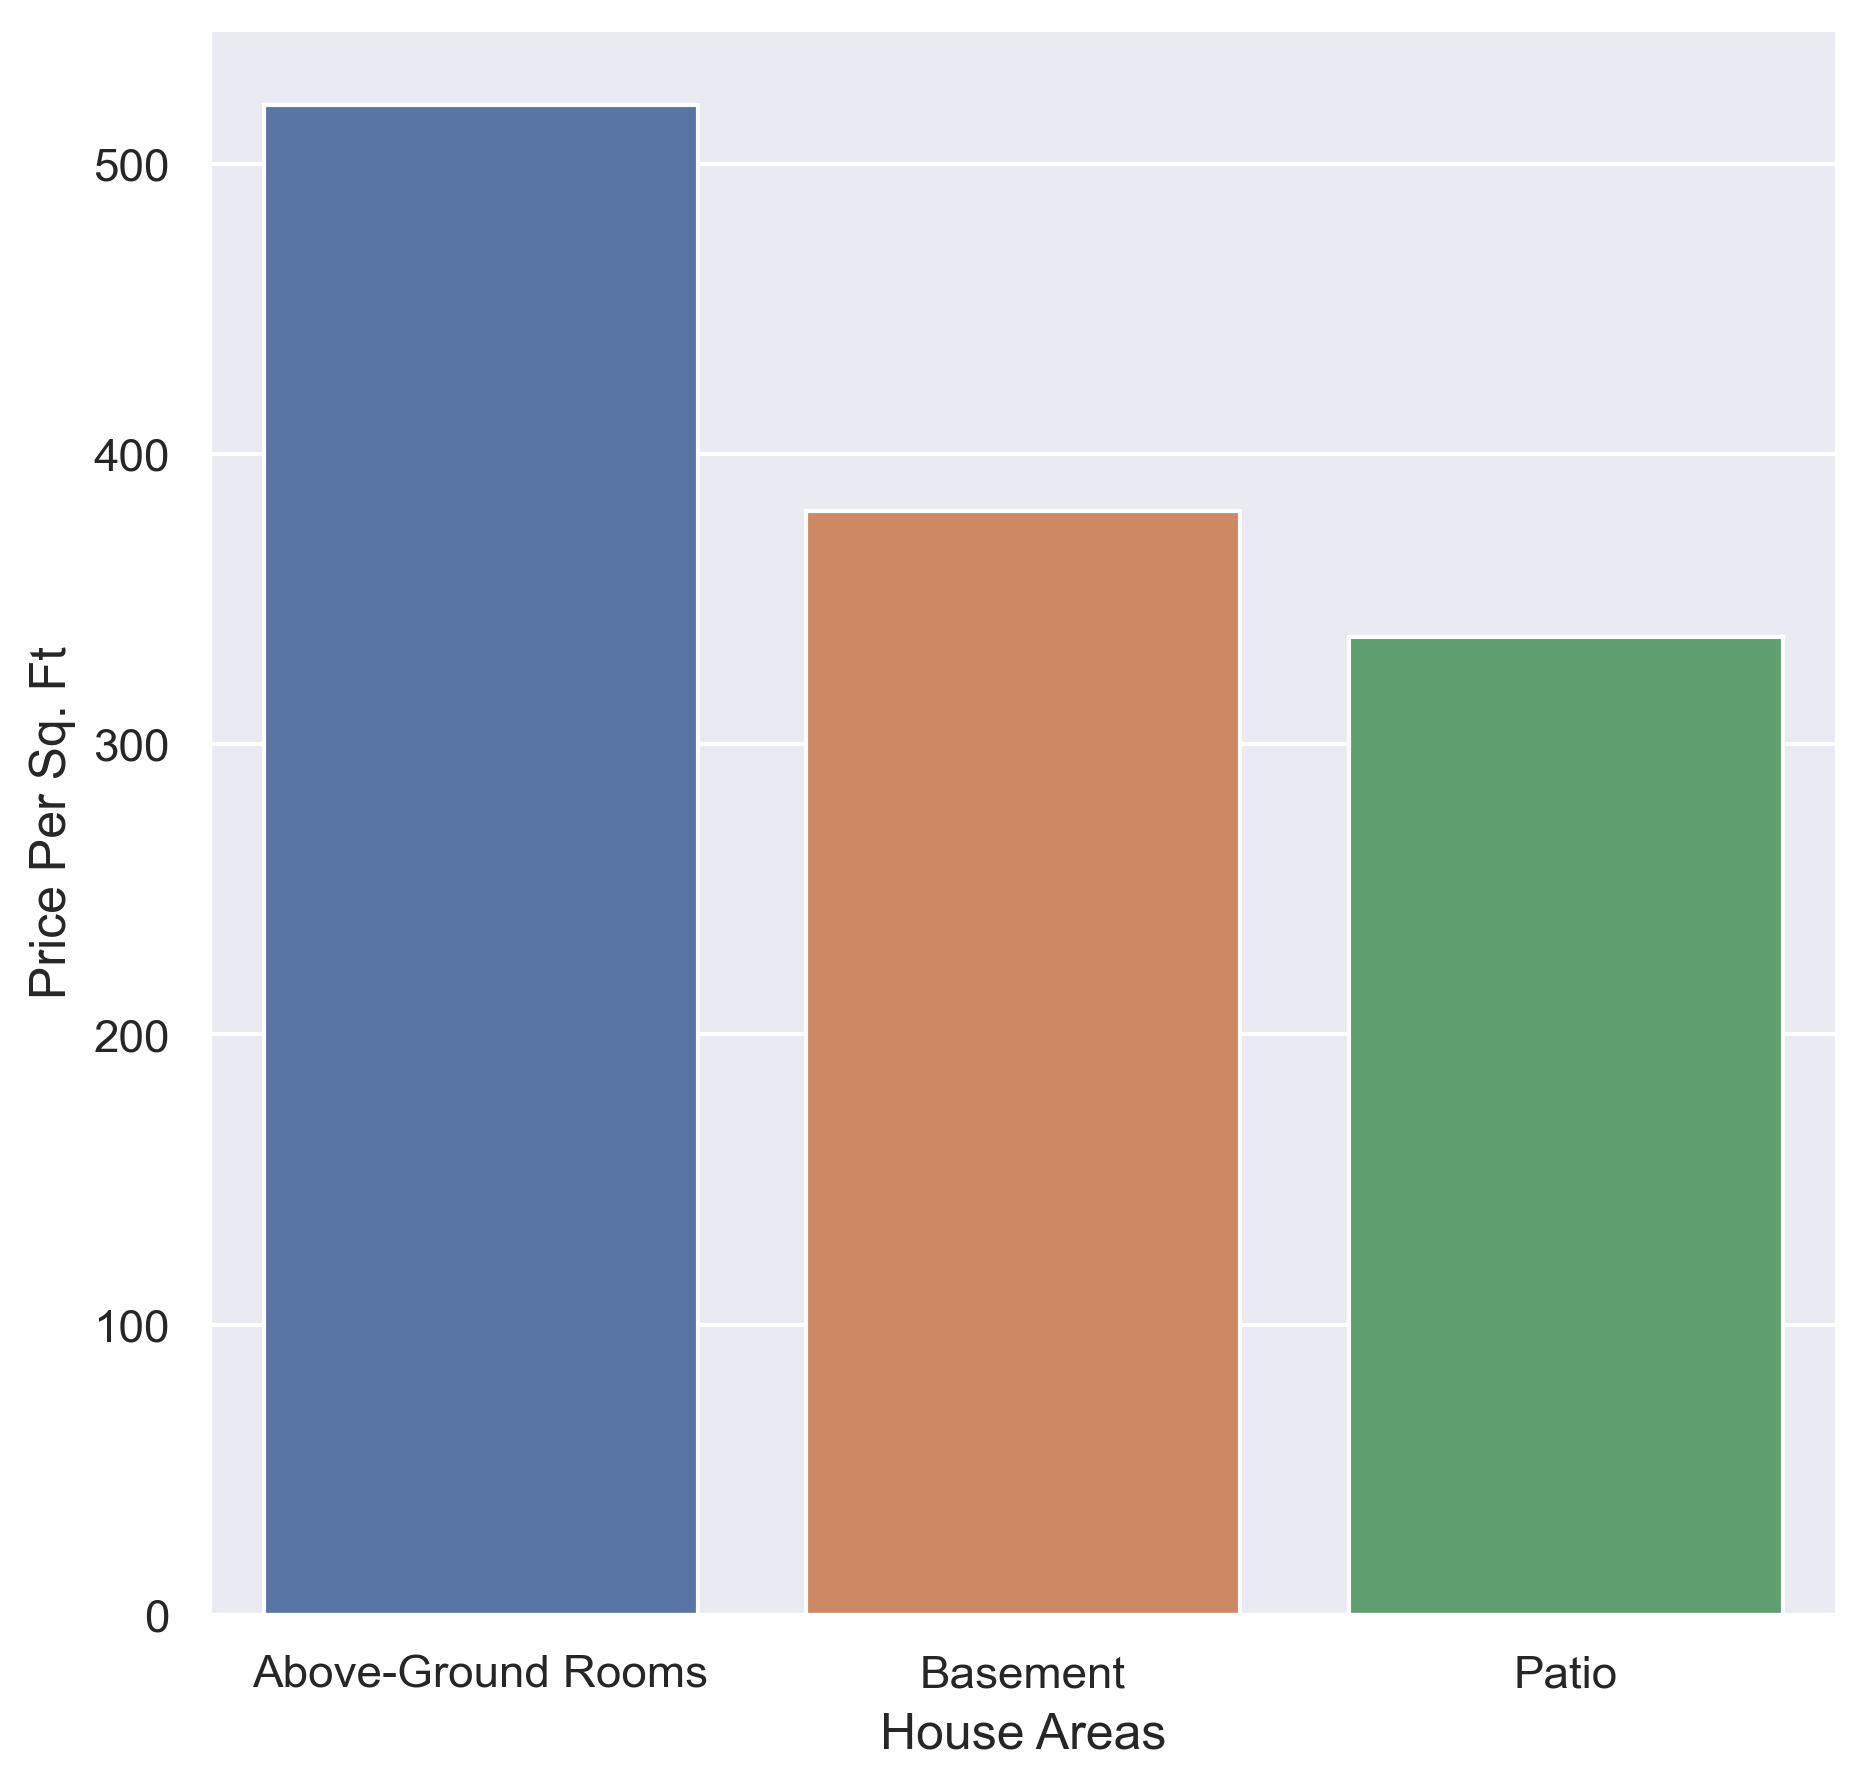

In [119]:
#if data_value >= 1000000:
 #   formatter = '{:1.1f}M'.format(data_value * 0.000001)
#else:
 #   formatter = '{:1.1f}K'.format(data_value * 0.001)
#return formatter

fig, ax = plt.subplots(figsize=(7,7))
fig = sns.barplot(data = graph_df, x = 'House Areas', y = 'Price Per Sq. Ft')
#plt.xlabel(x_cat)
#plt.ylabel(y_axis_title)
#plt.title(graph_title) # You can comment this line out if you don't need title
plt.show(fig)

# Etc

In [ ]:
df.head(3)

In [ ]:
df.info()

## Major Data Frame

In [ ]:
dummy_bathrooms
dummy_bedrooms
dummy_condition
dummy_floors
dummy_grade
dummy_heat_source

In [ ]:
 df1 = df.drop(['condition', 'grade', 'heat_source'], axis=1)

In [ ]:
df1.head()

In [ ]:
# Make dummy tables for potential categorical features

dummy_bedrooms = pd.get_dummies(df1['bedrooms'], drop_first=True)
dummy_bathrooms = pd.get_dummies(df1['bathrooms'], drop_first=True)
dummy_floors = pd.get_dummies(df1['floors'], drop_first=True)
#dummy_condition = pd.get_dummies(df['condition'], drop_first=True)
#dummy_grade = pd.get_dummies(df['grade'], drop_first=True)
#dummy_heat_source = df['heat_source'].str.get_dummies(sep='/')

In [ ]:
major_df = pd.concat([df1, dummy_bedrooms], axis=1)

In [ ]:
major_df.head()

In [ ]:
y = major_df.price
X = sm.add_constant(major_df.drop(['price', 'bedrooms'], axis=1))

In [ ]:
lm1 = sm.OLS(y, X).fit()

In [ ]:
print(lm1.summary())

In [ ]:
y = df.price
X = sm.add_constant(df[['bedrooms', 'bathrooms','nuisance','greenbelt']])

In [ ]:
lm2 = sm.OLS(y,X).fit()

In [ ]:
print(lm2.summary())

In [ ]:
Price = -1058 + bedrooms(57550) + bathrooms(382000) 

In [ ]:
sns.barplot(x ='bedrooms', y ='price', data = df)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
sns.barplot(x ='bathrooms', y ='price', data = df)

In [ ]:
plt.scatter(df['sqft_living'], df['price'])

In [ ]:
sns.barplot(x ='nuisance', y ='price', data = df)

In [ ]:
sns.barplot(x ='greenbelt', y ='price', data = df)

In [ ]:
sns.barplot(x ='waterfront', y ='price', data = df)

In [ ]:
df.waterfront.value_counts()
lol = df[(df.waterfront == 0)]
lmao = df[(df.waterfront == 1)]

In [ ]:
lol.price.mean()

In [ ]:
lmao.price.mean()

In [ ]:
sns.barplot(x ='floors', y ='price', data = df)

In [ ]:
plt.scatter(df['yr_built'], df['price'])

In [ ]:
plt.scatter(data['yr_renovated'], data['price'])

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['size_to_num_bedroom_ratio'] = df_copy['sqft_living'] / df_copy['bedrooms']

In [ ]:
y = df_copy.price
X = sm.add_constant(df_copy['size_to_num_bedroom_ratio'])

In [ ]:
lm3 = sm.OLS(y,X).fit()

In [ ]:
print(lm3.summary())

In [ ]:
df['waterfront'].value_counts()